In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [6]:
data = pd.read_csv("EastWestAirlines.csv")

In [7]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
data=data.dropna()

In [10]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [12]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [15]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

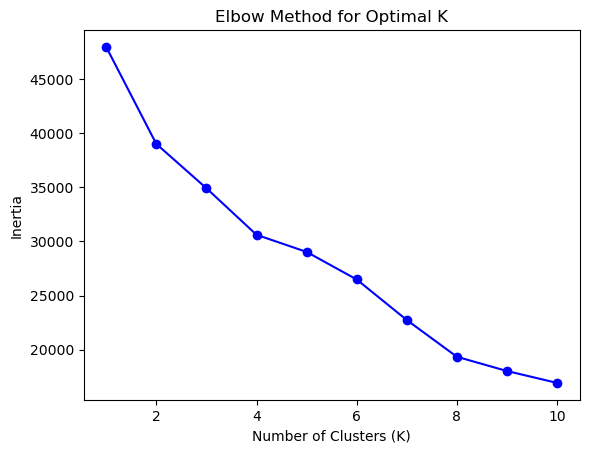

In [16]:
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to data
data['KMeans_Cluster'] = kmeans.labels_


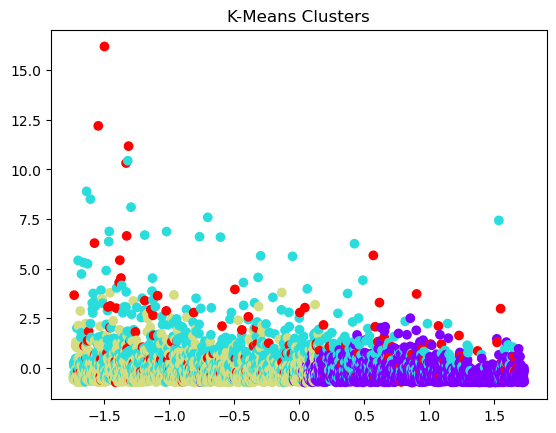

In [18]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title("K-Means Clusters")
plt.show()


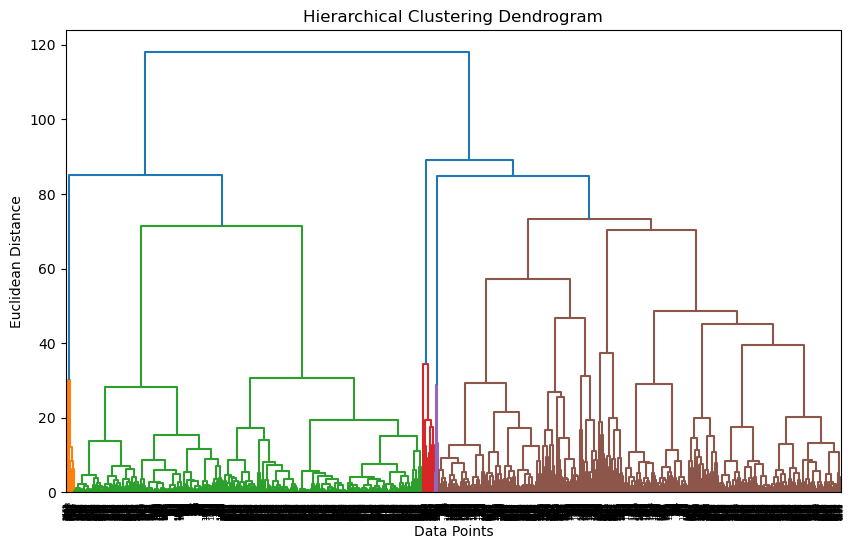

In [19]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [22]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')


data['Hierarchical_Cluster'] = hc.fit_predict(data_scaled)


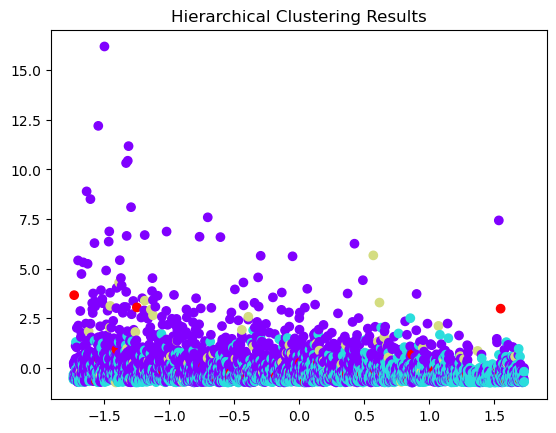

In [23]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hc.labels_, cmap='rainbow')
plt.title("Hierarchical Clustering Results")
plt.show()


In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

In [25]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

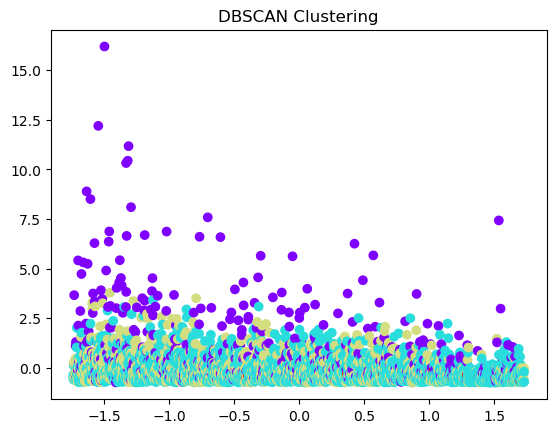

In [26]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['DBSCAN_Cluster'], cmap='rainbow')
plt.title("DBSCAN Clustering")
plt.show()


In [27]:
from sklearn.metrics import silhouette_score

print("K-Means Silhouette Score:", silhouette_score(data_scaled, data['KMeans_Cluster']))
print("Hierarchical Silhouette Score:", silhouette_score(data_scaled, data['Hierarchical_Cluster']))
print("DBSCAN Silhouette Score:", silhouette_score(data_scaled, data['DBSCAN_Cluster']))


K-Means Silhouette Score: 0.22808887010836637
Hierarchical Silhouette Score: 0.21135914614865942
DBSCAN Silhouette Score: 0.20660720499747498


In [29]:
cluster_summary = data.groupby('KMeans_Cluster').mean()
print(cluster_summary)



                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               3133.055231   39898.197531  106.287199   1.388564   1.016894   
1               1532.492552  127734.216485  160.202582   3.959285   1.001986   
2               1094.120278   56985.831149   96.370085   1.363917   1.018504   
3               1751.262821  194803.871795  810.397436   2.198718   1.038462   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000000   6271.906433     7.831709         201.923977   
1                1.047666  45887.323734    19.507448         371.256207   
2                1.000771   5886.720894     7.996916         227.814187   
3                1.000000  32475.410256    27.737179        5510.717949   

                Flight_trans_12  Days_since_enroll    Award?  \
KMea